## IMHOTEP: 1y total Freshwater flux (FWFLX) and Flux correction (FLXC) maps GLO and REG2
Maps of the Freshwater flux and flux correction (SSS restoring) applied during IMHOTEP experiment (NEMO).

1. Load data
2. Global plots
3. Plot a subregion corresponding to Mexican Gulf + Amazon mouth
4. Plot of the ratio of Flux correction on total freshwater flux
5. Plot of total flux without the flux correction (FWFLX - FLXC)

### Import modules

In [1]:
## standard libraries
import os,sys
import numpy as np

# xarray
import xarray as xr

# plot
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap

import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.cm as cm
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.colors import from_levels_and_colors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib import cm 
from matplotlib.colors import ListedColormap,LinearSegmentedColormap

import cartopy.feature as cfeature


# custom tools for plotting
sys.path.append('./')
from libimhotep import libSLXtoolsIMHOTEP as li


import cmocean

# for jupyter notebook display
%matplotlib inline

import pkg_resources


import warnings
warnings.filterwarnings('ignore')

plt.rcParams.update({'hatch.color': '#086A87'})

# list packages to be checked
root_packages = [
     'numpy', 
    'matplotlib', 'cartopy', 'cmocean']

# print versions, but check if package is imported first
for m in pkg_resources.working_set:
    if m.project_name.lower() in root_packages:
        print(f"{m.project_name}=={m.version}")

Name: libimhotep.libSLXtoolsIMHOTEP
Package: libimhotep
This is a collection of  tools i often use when analysing the IMHOTEP project data.
numpy==1.20.0
matplotlib==3.3.4
cmocean==2.0
Cartopy==0.18.0


In [2]:
prefix = "eORCA025.L75-IMHOTEP"

# NAME of ENSEMBLE EXPERIMENT:
# "EGAI": all runoffs varying
# "ES": all runoffs climatological
nexp = "EGAI"

varnasss = 'sosaline'

# ensemble size
NE=10

# years to read data from:
y1='1980'
y2='2018'

fo="1y" # output frequency

# input directory on work for grid info
diri="/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/"

# plot directory
diro="/gpfswork/rech/cli/regi915/PLT/dec2022/"+fo+"/"

# data output directory
dirdat="/gpfswork/rech/cli/regi915/DAT/"


### **1. Load data**

* Find directory and file list

In [3]:
# FLXC directory
diridat = li.Ffindinputdata(nexp,prefix=prefix)
print(diridat)

#  FLXC file list
ssrestor = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")
print(ssrestor)
varnarest = 'wdmp'

/gpfsstore/rech/cli/commun/IMHOTEP/ENSTATS_1y/EGAI/
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI*flxT.nc


* Load data

In [4]:
# select the imhov instance you want to load : FLXC
FLXC = li.imhov(ssrestor, varnarest,nexp,fo,y1,y2,diff=False,dirigrid=diri)

# load the data in this imhov instance
FLXC.loaddata()

# load grid info
FLXC.loadgridinfo()

# convert kg.m2 of freshwwater per second into m3/s
FLXC.convertRNF()

# detrend your data
FLXC.detrend()

In [5]:
FLXC.data

<xarray.DataArray 'wdmp' (time_counter: 39, y: 1207, x: 1442)>
dask.array<concatenate, shape=(39, 1207, 1442), dtype=float32, chunksize=(1, 1207, 1442), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: y, x
Attributes:
    units:             kg/m2/s
    valid_min:         0.0
    valid_max:         0.0
    long_name:         Surface Water Flux: Damping correction
    short_name:        N/A
    online_operation:  average
    axis:              N/A
    savelog10:         0.0
    iweight:           366

In [6]:
# FWFLX directory
diridat = li.Ffindinputdata(nexp,prefix=prefix)
print(diridat)

# FWFLX file list
ssrestor = li.Ffindinputdfiles(nexp,diridat,fo,prefix=prefix,fity="flxT")
print(ssrestor)
varnafw = 'sowaflup'

/gpfsstore/rech/cli/commun/IMHOTEP/ENSTATS_1y/EGAI/
/gpfsstore/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-IMHOTEP.EGAI.001-S/1y/????/eORCA025.L75-IMHOTEP.EGAI*flxT.nc


In [7]:
# select the imhov instance you want to load : FWFLX
FWFLX = li.imhov(ssrestor, varnafw,nexp,fo,y1,y2,diff=False,dirigrid=diri)

# load the data in this imhov instance
FWFLX.loaddata()

# load grid info
FWFLX.loadgridinfo()

# convert kg.m2 of freshwwater per second into m3/s
FWFLX.convertRNF()

# detrend your data
FWFLX.detrend()

In [8]:
FWFLX.data

<xarray.DataArray 'sowaflup' (time_counter: 39, y: 1207, x: 1442)>
dask.array<concatenate, shape=(39, 1207, 1442), dtype=float32, chunksize=(1, 1207, 1442), chunktype=numpy.ndarray>
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 1980-07-02 ... 2018-07-02T12:...
Dimensions without coordinates: y, x
Attributes:
    units:             kg/m2/s
    valid_min:         0.0
    valid_max:         0.0
    long_name:         Net Upward Water Flux
    short_name:        N/A
    online_operation:  average
    axis:              N/A
    savelog10:         0.0
    iweight:           366

### **2. Global plot of FLXC and FWFLX**


* Few data needed to plot as function of lat and lon

In [39]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

In [40]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
#pltcolparam['levbounds']=[-50e-6,50.3e-6,0.3e-5]
pltcolparam['levbounds']=[-30e-6,30.15e-6,0.15e-5]
#pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.2e'

pltgridparam = li.Fpltgridparamdefaults('GLO')

* Prepare data to plot by masking land grid cells

In [44]:
data2plot = FLXC.data.mean(dim='time_counter').compute()

In [45]:
#data2plot  = data2plot.where(mask!=0).squeeze()  
#data2plot  = data2plot.squeeze()  
m2plt      = mask.where(mask==0)

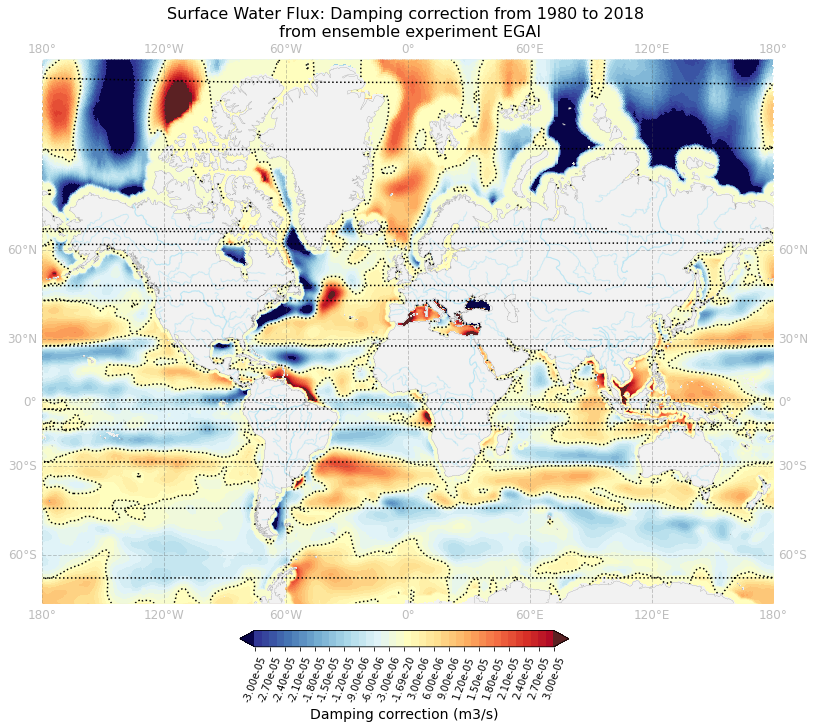

In [46]:
# name of the file in case you want to save it 
namo="FLXC_GLO_"+nexp+"_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/FLXC/"

#========= CREATE FIGURE
fig1 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)




#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD


#========= ADD CONTOUR DATA==0
cs3 = plt.contour(lon.squeeze(), lat.squeeze(), data2plot,levels=[0],colors=["k"],linestyles=[":"],transform=trdata,zorder=30)

#========= ADD COLORBAR
cb = li.Faddcolorbar(fig1,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='Damping correction (m3/s)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  


#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Surface Water Flux: Damping correction from 1980 to 2018 \n from ensemble experiment '+nexp,fontsize=16)


#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)



* Few data needed to plot as function of lat and lon


In [16]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

In [17]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
#pltcolparam['levbounds']=[-50e-6,50.3e-6,0.3e-5]
pltcolparam['levbounds']=[-30e-6,30.15e-6,0.15e-5]
#pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.2e'

pltgridparam = li.Fpltgridparamdefaults('GLO')

* Prepare data to plot by masking land grid cells

In [18]:
data2plot = FWFLX.data.mean(dim='time_counter').compute()

In [19]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

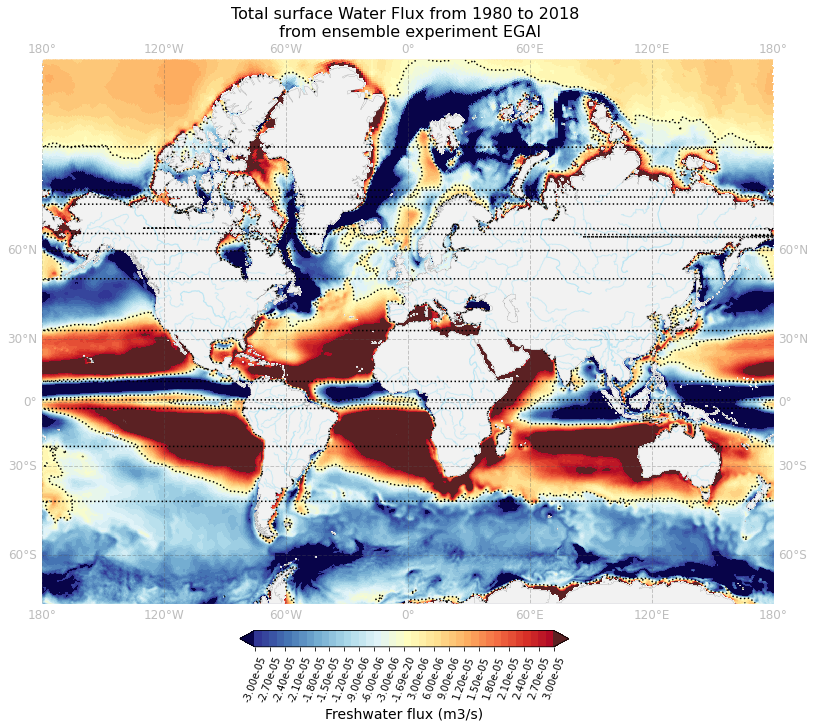

In [20]:
# name of the file in case you want to save it 
namo="FWFLX_GLO_"+nexp+"_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/FLXC/"

#========= CREATE FIGURE
fig1 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD CONTOUR DATA==0
cs3 = plt.contour(lon.squeeze(), lat.squeeze(), data2plot,levels=[0],colors=["k"],linestyles=[":"],transform=trdata,zorder=30)

#========= ADD COLORBAR
cb = li.Faddcolorbar(fig1,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='Freshwater flux (m3/s)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Total surface Water Flux from 1980 to 2018 \n from ensemble experiment '+nexp,fontsize=16)


#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)


### **3. Plot a subregion corresponding to Mexican Gulf + Amazon mouth**

* Choose your subregion using lat and lon coordinates

In [21]:
# latitude and longitude values you want to select the region over
lonselect=[-100,-40]
latselect=[-5,31]

* Few data needed to plot as function of lat and lon

In [22]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

In [23]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[-30e-6,30.15e-6,0.15e-5]
#pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.2e'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


* Prepare data to plot by masking land grid cells

In [24]:
data2plot = FLXC.data.mean(dim='time_counter').compute()

In [25]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

* Plot

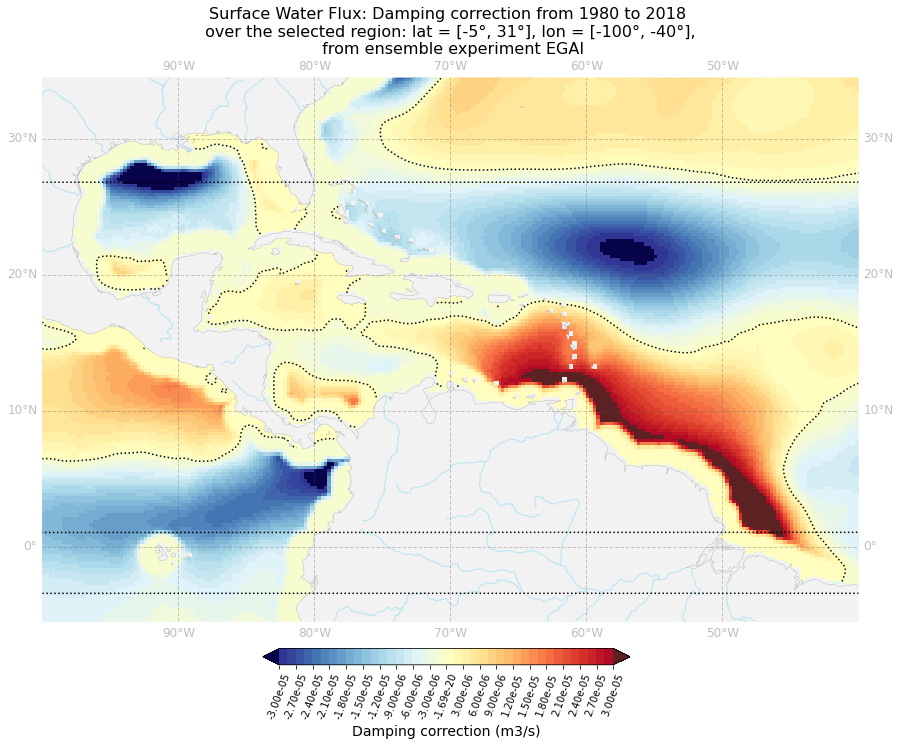

In [26]:
# name of the file in case you want to save it 
namo='FLXC_REG2_'+nexp+'_1980-2018'
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/FLXC/"

#========= CREATE FIGURE
fig1 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)
        
#========= ADD CONTOUR DATA==0
cs3 = plt.contour(lon.squeeze(), lat.squeeze(), data2plot,levels=[0],colors=["k"],linestyles=[":"],transform=trdata,zorder=30)

        
#========= ADD COLORBAR
cb = li.Faddcolorbar(fig1,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='Damping correction (m3/s)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Surface Water Flux: Damping correction from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°], \n from ensemble experiment '+nexp,fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)

* FWFLX

In [35]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

pltcolparam = li.Fpltsetcolorsdefaults('TR')
#pltcolparam['levbounds']=[-50e-6,50.3e-6,0.3e-5]
pltcolparam['levbounds']=[-30e-6,30.15e-6,0.15e-5]
#pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.2e'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


In [36]:
data2plot = FWFLX.data.mean(dim='time_counter').compute()

In [37]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

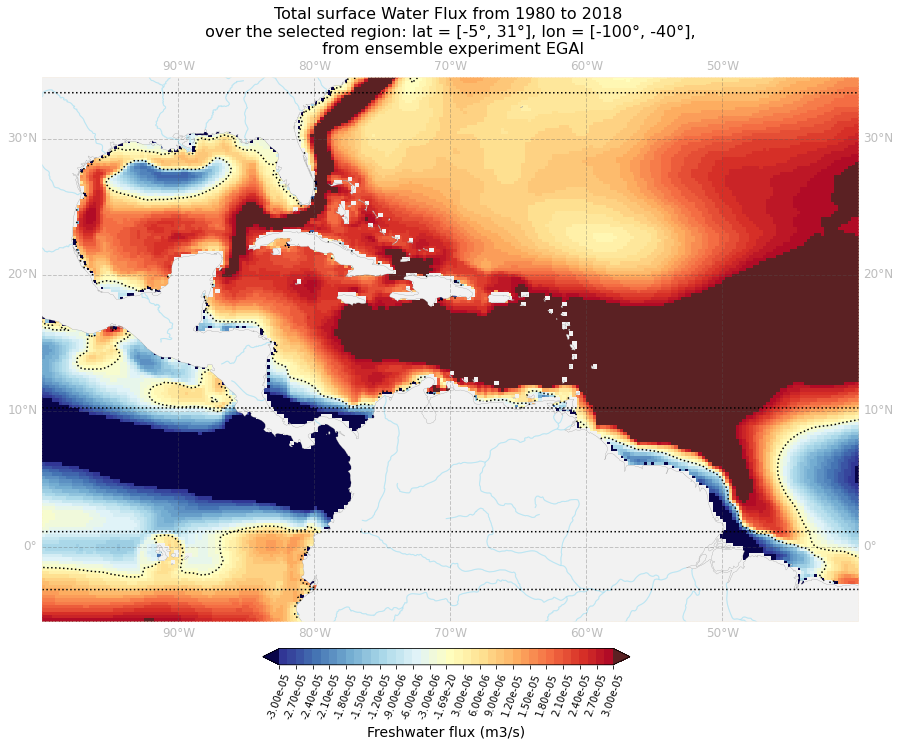

In [38]:
# name of the file in case you want to save it 
namo='FWFLX_REG2_'+nexp+'_1980-2018'
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/FLXC/"

#========= CREATE FIGURE
fig1 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD CONTOUR DATA==0
cs3 = plt.contour(lon.squeeze(), lat.squeeze(),data2plot,levels=[0],colors=["k"],linestyles=[":"],transform=trdata,zorder=30)

#========= ADD COLORBAR
cb = li.Faddcolorbar(fig1,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='Freshwater flux (m3/s)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Total surface Water Flux from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°], \n from ensemble experiment '+nexp,fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)

### **4. Ratio plots**

* compute the ratio of FLXC over FWFLX

In [80]:
data2plot2

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [74]:
ratFLXC =(FLXC.data.mean(dim='time_counter')/FWFLX.data.mean(dim='time_counter'))*100
#ratFLXC =FLXC.data/FWFLX.data
#ratFLXC.mean(dim='time_counter')*100

In [75]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

In [76]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[-200,205,10]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.1f'

pltgridparam = li.Fpltgridparamdefaults('GLO')

In [81]:
data2plot = ratFLXC

In [82]:
data2plot2 = ratFLXC.where(ratFLXC.data==0).to_numpy()

In [83]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

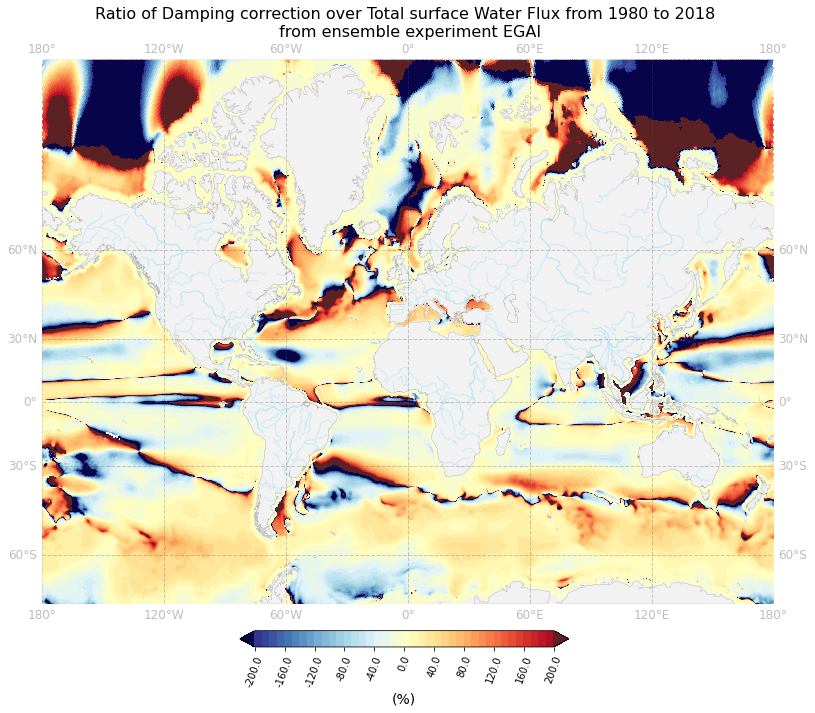

In [84]:
# name of the file in case you want to save it 
namo="ratFLXC_GLO_"+nexp+"_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/FLXC/"

#========= CREATE FIGURE
fig1 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD CONTOUR DATA==0
cs3 = plt.contour(lon.squeeze(), lat.squeeze(),data2plot2,levels=[150000],colors=["k"],linestyles=[":"],transform=trdata,zorder=30)

#========= ADD COLORBAR
cb = li.Faddcolorbar(fig1,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='(%)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Ratio of Damping correction over Total surface Water Flux from 1980 to 2018 \n from ensemble experiment '+nexp,fontsize=16)


#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)


In [85]:
# latitude and longitude values you want to select the region over
lonselect=[-100,-40]
latselect=[-5,31]

In [86]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

In [87]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

pltcolparam = li.Fpltsetcolorsdefaults('TR')
pltcolparam['levbounds']=[-200,210,10]
pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.1f'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)


- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


In [88]:
data2plot = ratFLXC


In [89]:
data2plot2 = ratFLXC.where(ratFLXC.data==0).to_numpy()

In [90]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

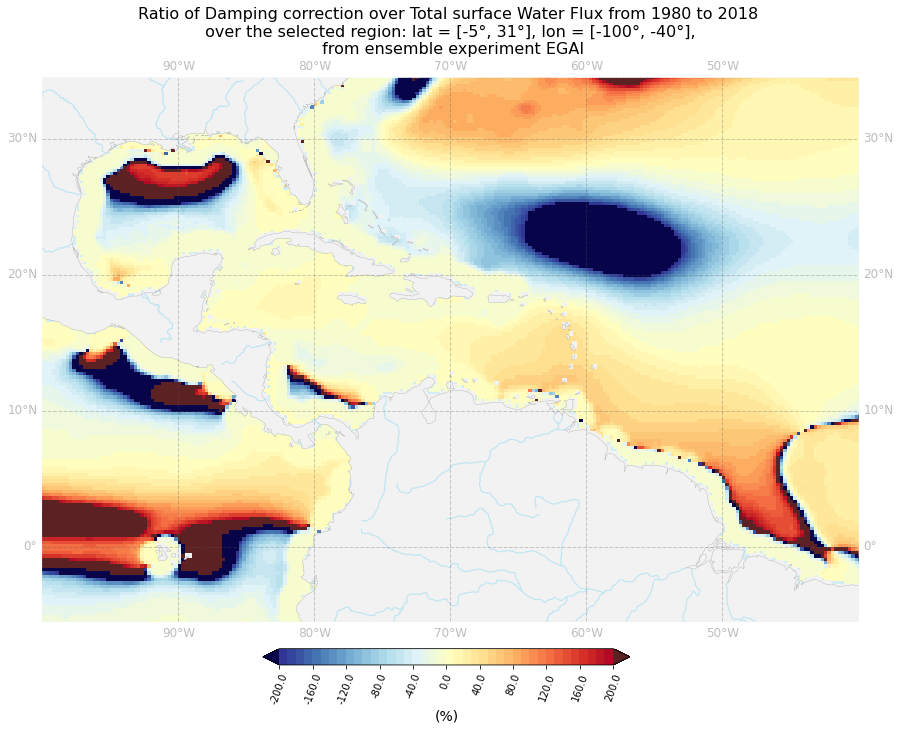

In [92]:
# name of the file in case you want to save it 
namo='ratFLXC_REG2_'+nexp+'_1980-2018'
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/FLXC/"

#========= CREATE FIGURE
fig1 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD CONTOUR DATA==0
cs3 = plt.contour(lon.squeeze(), lat.squeeze(),data2plot2,levels=[150000],colors=["k"],linestyles=[":"],transform=trdata,zorder=30)
        
#========= ADD COLORBAR
cb = li.Faddcolorbar(fig1,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='(%)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Ratio of Damping correction over Total surface Water Flux from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°], \n from ensemble experiment '+nexp,fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)

### **5. Plots total flux without the flux correction (FWFLX - FLXC)**

* Compute the difference

In [93]:
diffFWFLXC =FWFLX.data.mean(dim='time_counter')-FLXC.data.mean(dim='time_counter')

In [94]:
diffFWFLXC

<xarray.DataArray (y: 1207, x: 1442)>
dask.array<sub, shape=(1207, 1442), dtype=float32, chunksize=(1207, 1442), chunktype=numpy.ndarray>
Dimensions without coordinates: y, x

In [95]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

In [96]:
pltcolparam = li.Fpltsetcolorsdefaults('TR')
#pltcolparam['levbounds']=[-50e-6,50.3e-6,0.3e-5]
pltcolparam['levbounds']=[-30e-6,30.15e-6,0.15e-5]
#pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.2e'

pltgridparam = li.Fpltgridparamdefaults('GLO')

In [97]:
data2plot = diffFWFLXC

In [98]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

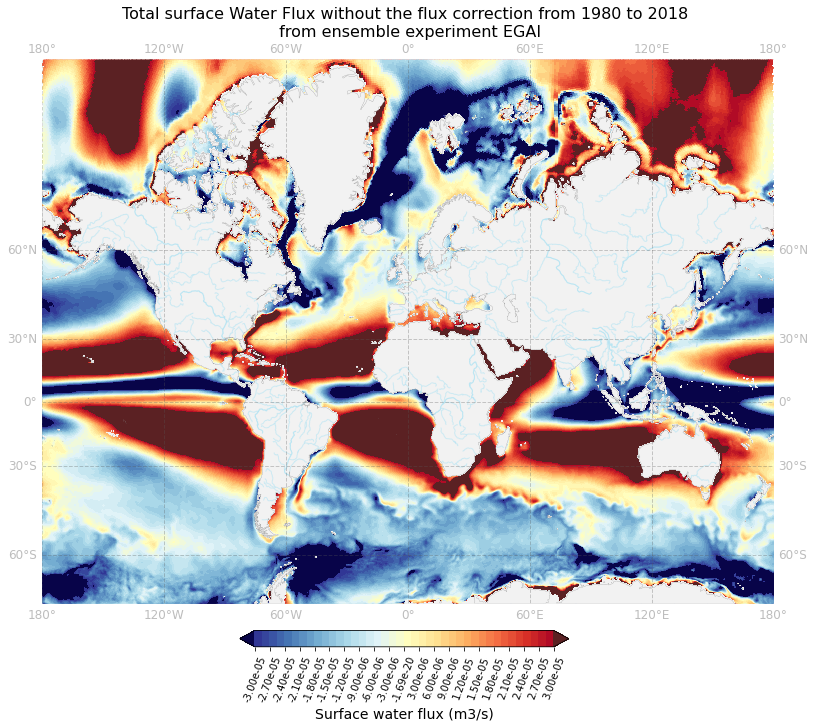

In [100]:
# name of the file in case you want to save it 
namo="diffFWFLXC_GLO_"+nexp+"_1980-2018"
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/FLXC/"

#========= CREATE FIGURE
fig1 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION FOR GLOBAL MAPS
ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= ADD CONTOUR DATA==0
#cs3 = plt.contour(lon.squeeze(), lat.squeeze(), data2plot2,levels=[150000],colors=["k"],linestyles=[":"],transform=trdata,zorder=30)

#========= ADD COLORBAR
cb = li.Faddcolorbar(fig1,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='Surface water flux (m3/s)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Total surface Water Flux without the flux correction from 1980 to 2018 \n from ensemble experiment '+nexp,fontsize=16)


#========= FREMOVE FRAME 
li.Fnospines(ax)

plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)

* Regional plot

In [101]:
# latitude and longitude values you want to select the region over
lonselect=[-100,-40]
latselect=[-5,31]

In [102]:
dirigrid = '/gpfswork/rech/cli/rcli002/eORCA025.L75/eORCA025.L75-I/'
lat = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lat']
lon = xr.open_dataset(dirigrid+'mesh_hgr.nc')['nav_lon']   
mask = xr.open_dataset(dirigrid+'mesh_hgr.nc')['tmask'][0,0,:,:]

In [103]:
# predifined region over which to plot:  'GLO' 'gro' 'atl' 'tropatl' 'asia' 'ind' 'bof'
# 'GLO' for global plot
reg='atl'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)

pltcolparam = li.Fpltsetcolorsdefaults('TR')
#pltcolparam['levbounds']=[-50e-6,50.3e-6,0.3e-5]
pltcolparam['levbounds']=[-30e-6,30.15e-6,0.15e-5]
#pltcolparam['cbincr']=4
pltcolparam['cbformat']='%.2e'
    
#set default grid parameters before plotting
pltgridparam = li.Fpltgridparamdefaults(reg=reg)
# [minlon, maxlon, minlat, maxlat]
pltgridparam['axextent']=[lonselect[0],lonselect[1],latselect[0],latselect[1]]
pltgridparam['minlat']=pltgridparam['axextent'][2]
pltgridparam['minlat']=pltgridparam['axextent'][3]
pltgridparam['incrgridlat']=10
pltgridparam['incrgridlon']=10
print('- pltgridparam')
print(pltgridparam)

- pltgridparam
{'reg': 'atl', 'gridl': False, 'incrgridlon': 10, 'incrgridlat': 10, 'sath': 35785831, 'minlat': 31, 'maxlat': 35, 'minlon': -180, 'maxlon': 180, 'loncentr': -35, 'latcentr': 10, 'axextent': [-100, -40, -5, 31]}


In [104]:
data2plot = diffFWFLXC

In [105]:
data2plot  = data2plot.where(mask!=0).squeeze()  
m2plt      = mask.where(mask==0)

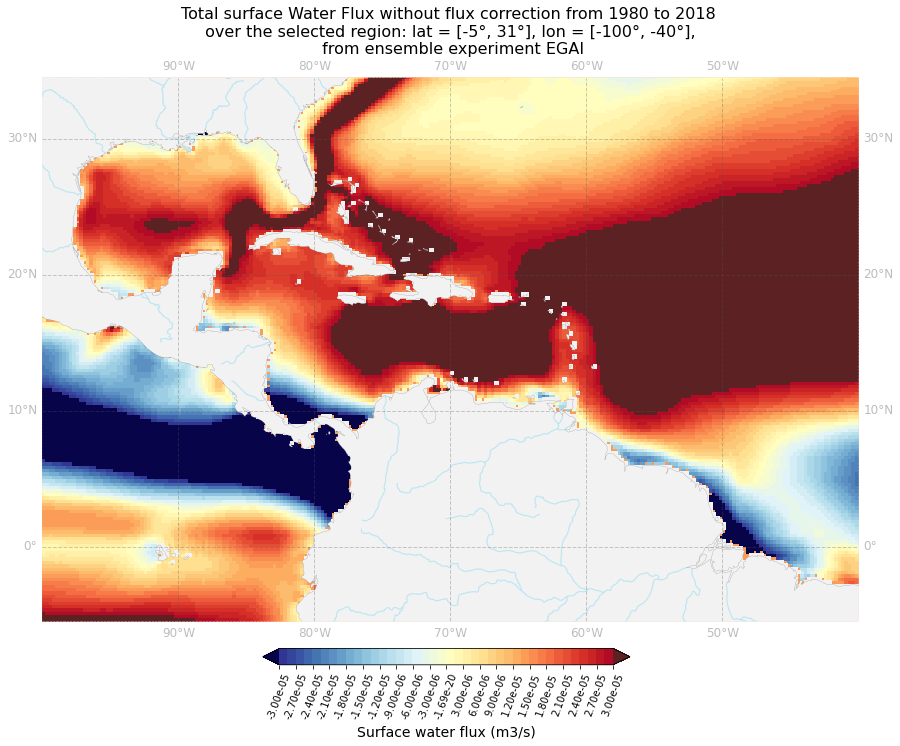

In [106]:
# name of the file in case you want to save it 
namo='diffFWFLXC_REG2_'+nexp+'_1980-2018'
gp = 0
NGP=5

# plot directory
diro="/gpfs7kw/linkhome/rech/genige01/ufi72ye/NOTEBOOKS/Maps/1y/FLXC/"

#========= CREATE FIGURE
fig1 = plt.figure(figsize=([18,10]),facecolor='white')

#========= CREATE COLORMAP
cmap,norm,levels = li.Fmycolormap(pltcolparam['levbounds'],cm_base=pltcolparam['cm_base'],cu=pltcolparam['cu'],co=pltcolparam['co']) ##080449

#========= DATA SYSTEM PROJECTION (USE PlateCarre if coordinates are in lon, lat)
trdata  = ccrs.PlateCarree() 

#========= DEAL WITH PROJECTION DEPENDING ON IF TARGET IS GLOBAL MAP OR REGIONAL MAP
if (reg=='GLO'):
        ax = plt.axes(projection= ccrs.Mercator(central_longitude=pltgridparam['loncentr'],min_latitude=pltgridparam['minlat'], max_latitude=pltgridparam['maxlat'], globe=None))
else:
        ax = plt.axes(projection= ccrs.PlateCarree(central_longitude=pltgridparam['loncentr']))

#========= THIS IS WHERE THE MODEL VARIABLE (SUCH AS SSS) IS ACTUALLY PLOTTED        
cs   = plt.pcolormesh(lon.squeeze(), lat.squeeze(), data2plot,shading='flat',cmap=cmap,transform=trdata,norm=norm)


#========= GREY SHADING ON CONTINENTS
# add grey shading  where ocean mask is 0 (land gridpoints in the model)
# rgb color for model land grid points
r=pltcolparam['rgb'][0];g=pltcolparam['rgb'][1];b=pltcolparam['rgb'][2]
# color for continents from data based (hi-res)
onecohrml=pltcolparam['onecohrml']
alphaland=pltcolparam['alphaland']
# add on plot
csland  = plt.pcolormesh(lon.squeeze(), lat.squeeze(), m2plt, shading='flat',cmap=li.Fmake_SLXcolormap(reverse=False,whichco='oneco',r=r,g=g,b=b),transform=trdata)


#========= ADD GEOGRAPHICAL FEATURES
# make plot nice with rivers, continents, grids:
ax,gl = li.Fpltaddfeatures(ax,pltgridparam['incrgridlon'],pltgridparam['incrgridlat'],onecohrml=pltcolparam['onecohrml'],alphaland=pltcolparam['alphaland'],reg=pltgridparam['reg'],landedgeco=pltcolparam['landedgeco'])  ##585858#BDBDBD

#========= SET FRAME AND GEOGRAPHICAL PLOT EXTENT
if (reg=='GLO'):
        li.Fnospines(ax)
else:
        # geographical limits
        ax.set_extent([pltgridparam['axextent'][0],pltgridparam['axextent'][1],pltgridparam['axextent'][2],pltgridparam['axextent'][3]])
        # remove spines from around plot
        li.Fnospines(ax)

#========= ADD CONTOUR DATA==0
cs3 = plt.contour(lon.squeeze(), lat.squeeze(),data2plot2,levels=[150000],colors=["k"],linestyles=[":"],transform=trdata,zorder=30)

#========= ADD COLORBAR
cb = li.Faddcolorbar(fig1,cs,ax,pltcolparam['levbounds'],levincr=pltcolparam['cbincr'],tformat=pltcolparam['cbformat'],
                         tlabel='Surface water flux (m3/s)',facmul=1,orientation='horizontal',tc='k',
                        bbta=(-0.18,-0.25,0.9,0.2))  

#========= ADD TITLE
ax.xaxis.set_label_position('top')
ax.set_title('Total surface Water Flux without flux correction from 1980 to 2018 \n over the selected region: lat = ['+str(latselect[0])+'°, '+str(latselect[1])+'°], lon = ['+str(lonselect[0])+'°, '+str(lonselect[1])+'°], \n from ensemble experiment '+nexp,fontsize=16)


plt.show()

# Save fig in png, resolution dpi    
#li.Fsaveplt(fig1,diro,namo,dpifig=300)